# Dataset Importing and Querying

In [1]:
# Importing all necessary libraries to proceed with this project.

import warnings
import itertools
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Walmart (1).csv')
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
walmart_store_group = data.groupby(['Store', 'Date'])[['Weekly_Sales']].sum()
walmart_store_group.reset_index(inplace = True)
walmart_store_group.head()

Store        Date  Weekly_Sales
0      1  01-04-2011    1495064.75
1      1  01-06-2012    1624477.58
2      1  01-07-2011    1488538.09
3      1  01-10-2010    1453329.50
4      1  02-03-2012    1688420.76

In [4]:
data.shape

(6435, 8)

In [5]:
# Want to check the date column is in object format or datetime
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [7]:
import calendar


In [8]:

# Converting Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extracting details from date given. so that can be used for seasonal checks or grouping
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Changing the Months value from numbers to real values like Jan, Feb to Dec
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])


In [9]:
# Lets look into the null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [10]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment          Day         Year  
count  6435.000000   6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151    15.650350  2010.965035  
std      39.356712      1.875885     8.753908     0.797019  
min     126.064000      3.879000     1.000000  2010.000000  
25%     131.735000      6.891000     8.000000  2010.000000  
50%     182.616521      7.874000    16.000000  2011.000000  
75%     212.743293      8.622000    23.000000  2012.000000  
max     227.232807     14.313000    31.000000  2012.000000

In [11]:
#add a 'week' column to the dataset for further analysis
data['Week'] = data.Date.dt.isocalendar().week 

# Exploratory data analysis (EDA)

In [12]:
data.describe().T.style.bar(subset=['mean'],color = '#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

In [13]:
df_weeks = data.groupby('Week').sum()
import plotly.express as px
fig= px.line(data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales',
'x' : 'Weeks'}, title = 'Sales over Weeks')
fig.update_traces(line_color = 'deeppink', line_width=3)
fig.show()

In [16]:
df_weeks.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Week                                                               
1      4140  1.815590e+08             0     12163.83     619.357   
2      2070  8.269676e+07             0      3167.09     291.404   
3      2070  8.273564e+07             0      3476.88     293.341   
4      2070  7.943483e+07             0      3455.57     294.581   
5      3105  1.462024e+08             0      7908.33     419.259   

               CPI  Unemployment   Day    Year  
Week                                            
1     30873.561293      1446.410  1215  361980  
2     15430.151991       710.979  1215  181035  
3     15443.190027       710.979  1845  181035  
4     15456.228061       710.979  2475  181035  
5     22981.152338      1099.558   630  271440

<Figure size 2000x1500 with 0 Axes>

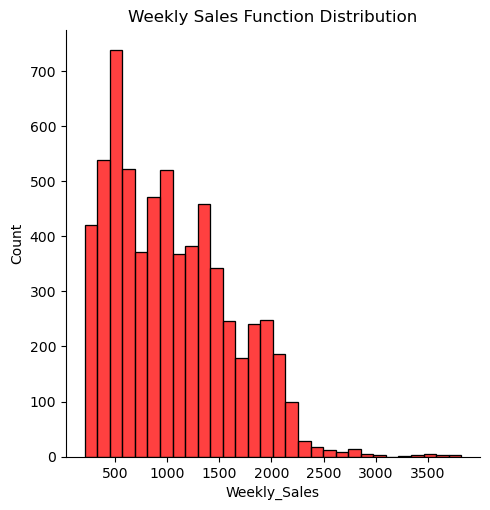

In [17]:
# From the Describe function we see that weekly sales for each store are very high. 
# we will scale down the value for ease of use and revert back when we look residuals or where necessary

plt.figure(figsize=(20,15))
data['Weekly_Sales'] = data.Weekly_Sales/1000

sns.displot(data.Weekly_Sales, kde = False, bins = 30, color = 'red')
plt.title('Weekly Sales Function Distribution')
plt.show()


In the Distribution, natural Log of Sales and the square root of Sales look better distributed. We can use Natural Log for predictions later


In [18]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

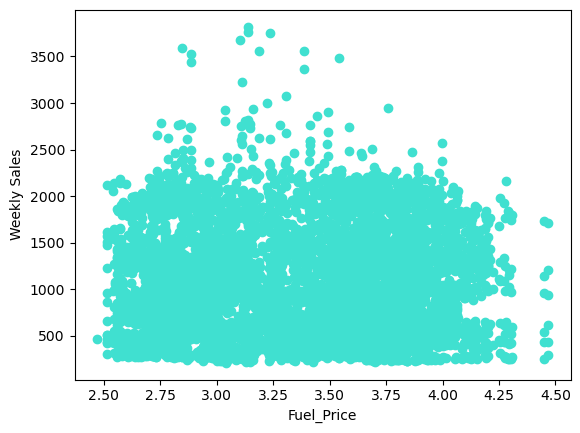

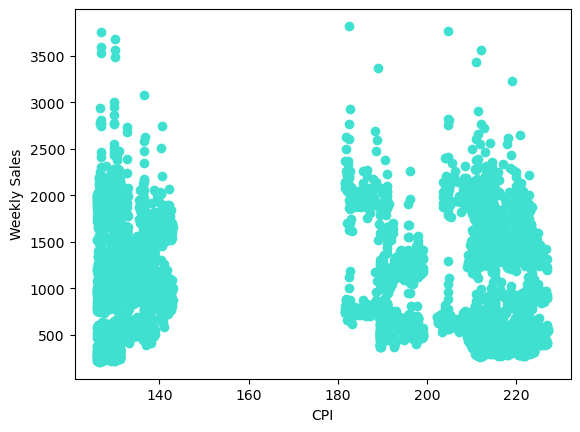

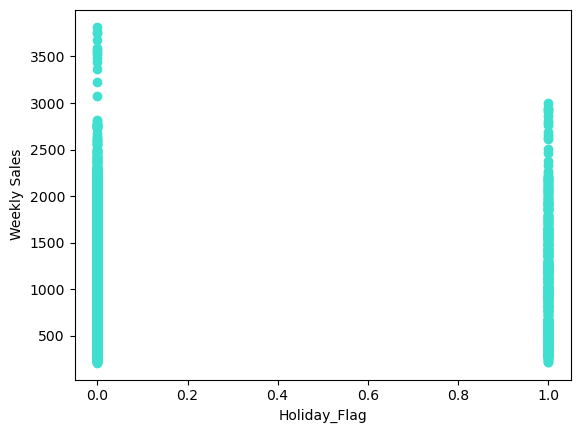

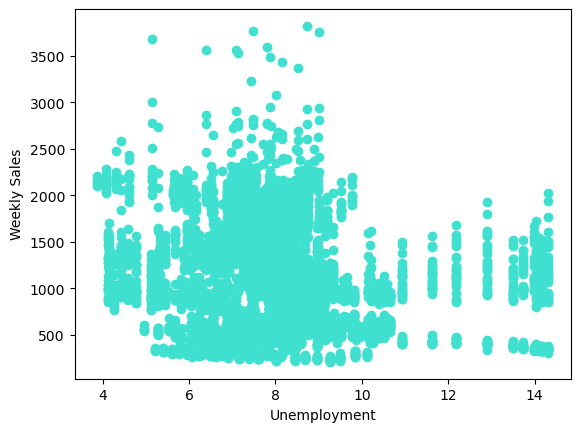

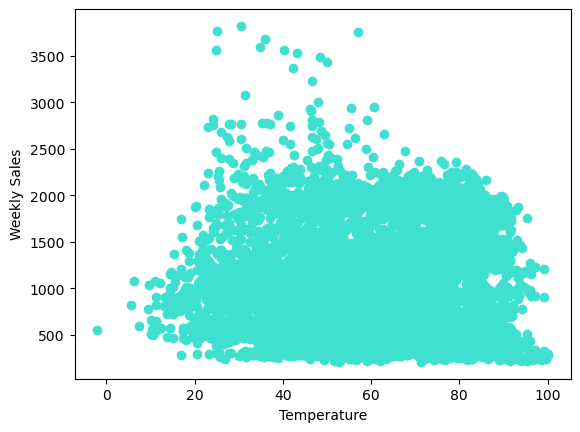

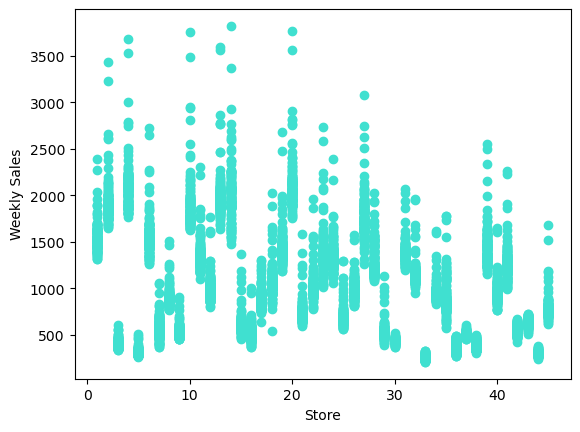

In [19]:
scatter(data, 'Fuel_Price')
scatter(data, 'CPI')
scatter(data, 'Holiday_Flag')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')


In [20]:
data['Week'] = data.Date.dt.isocalendar().week

In [21]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643.69090             0        42.31       2.572   
1      1 2010-12-02    1641.95744             1        38.51       2.548   
2      1 2010-02-19    1611.96817             0        39.93       2.514   
3      1 2010-02-26    1409.72759             0        46.63       2.561   
4      1 2010-05-03    1554.80668             0        46.50       2.625   

          CPI  Unemployment  Day Month  Year  Week  
0  211.096358         8.106    2   May  2010    17  
1  211.242170         8.106    2   Dec  2010    48  
2  211.289143         8.106   19   Feb  2010     7  
3  211.319643         8.106   26   Feb  2010     8  
4  211.350143         8.106    3   May  2010    18

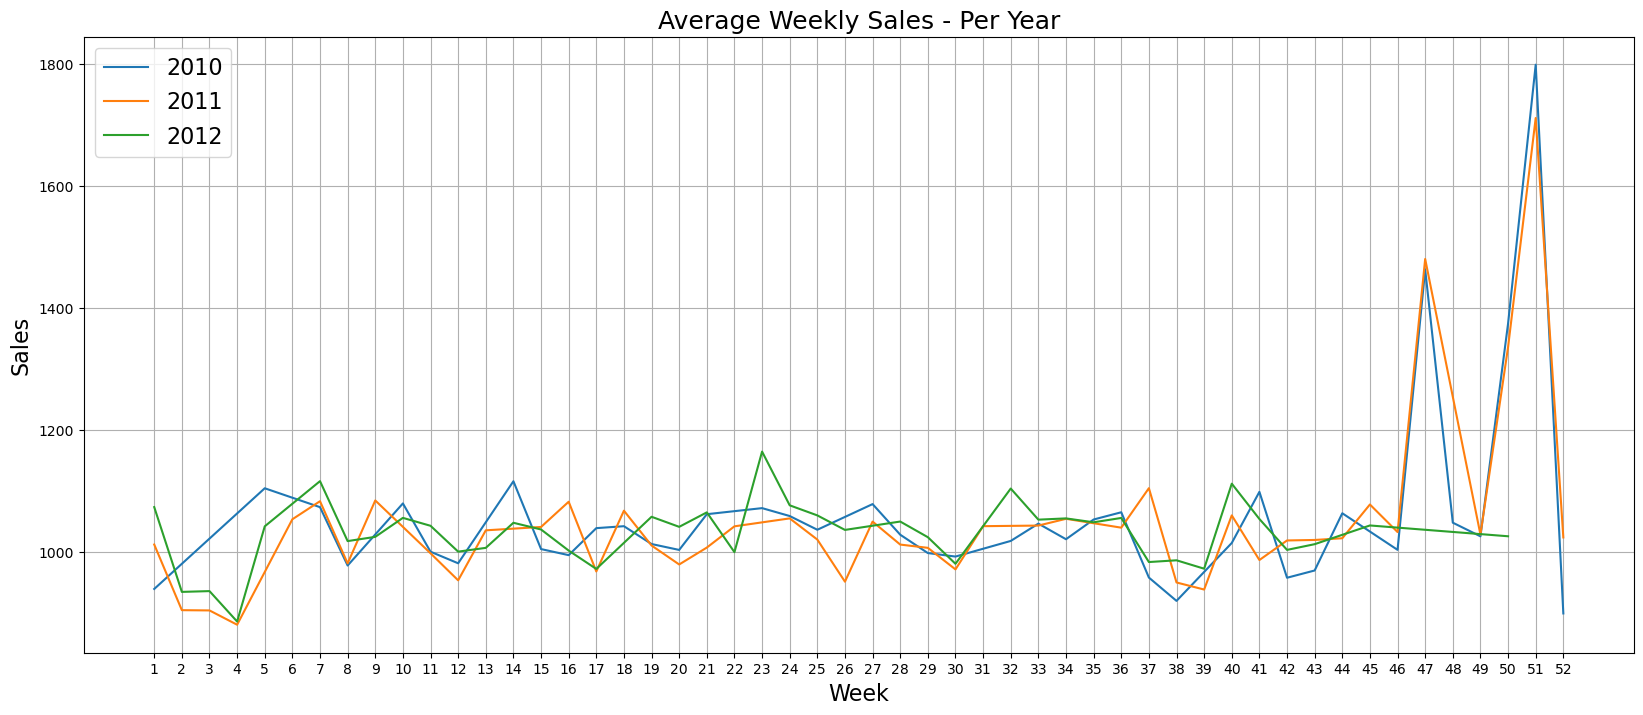

In [22]:
weekly_sales_2010 = data[data.Year==2010]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2011 = data[data.Year==2011]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2012 = data[data.Year==2012]['Weekly_Sales'].groupby(data['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()


In [23]:
data.head(1)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02     1643.6909             0        42.31       2.572   

          CPI  Unemployment  Day Month  Year  Week  
0  211.096358         8.106    2   May  2010    17

# Note :

**As we can see, there is one important Holiday not included in 'Holiday_Flag'. It's the Easter Day. It is always in a Sunday, but can fall on different weeks.**

In 2010 is in Week 13

In 2011, Week 16

Week 14 in 2012

Week 13 in 2013 for **Test set**

**So, we can change to 'True' these Weeks in each Year.**

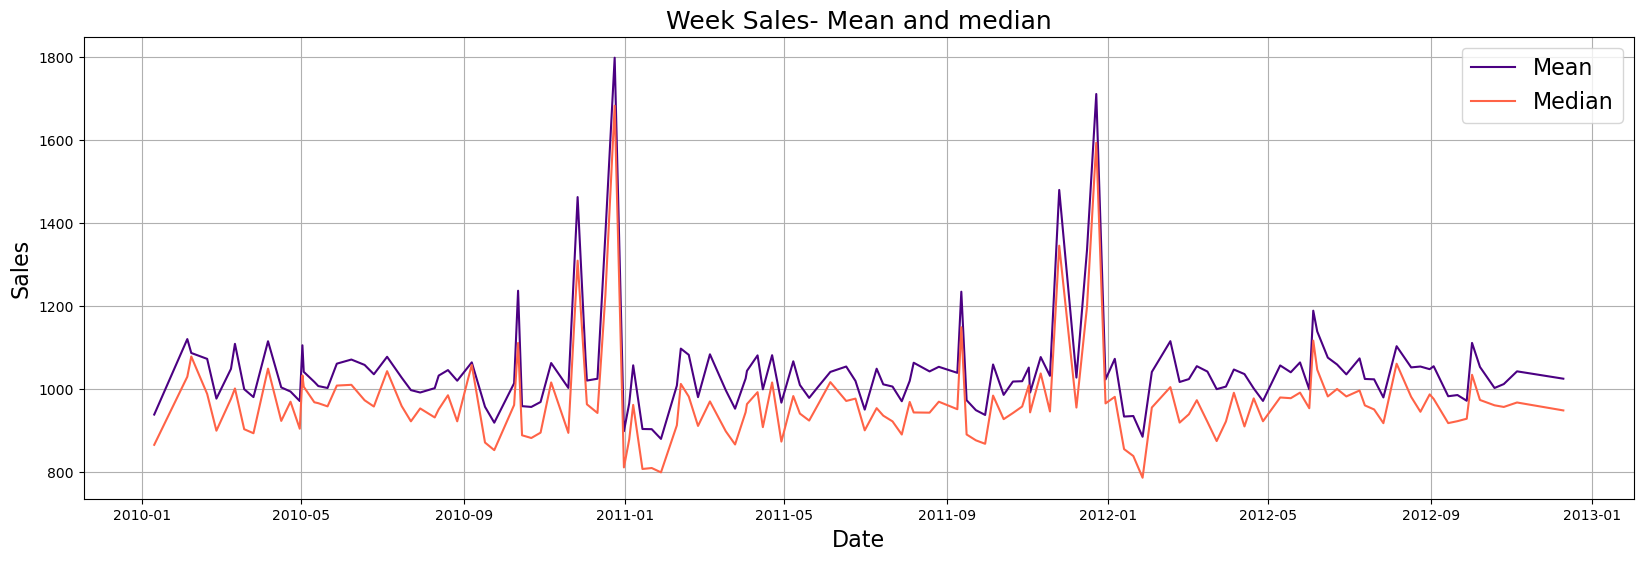

In [24]:
weekly_sales_mean = data['Weekly_Sales'].groupby(data['Date']).mean()
weekly_sales_median = data['Weekly_Sales'].groupby(data['Date']).median()
plt.figure(figsize=(20,6))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values, color = 'indigo')
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Week Sales- Mean and median', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

# Checking the relationship  of the other features with weekly sales

In [25]:
px.histogram(data, x= 'Temperature', y= 'Weekly_Sales', color= 'Holiday_Flag', marginal= 'box')

In [26]:
px.histogram(data, x= 'Fuel_Price', y= 'Weekly_Sales', color= 'Holiday_Flag', marginal= 'box')

In [27]:
px.histogram(data, x= 'CPI', y= 'Weekly_Sales', color= 'Holiday_Flag', marginal= 'box')

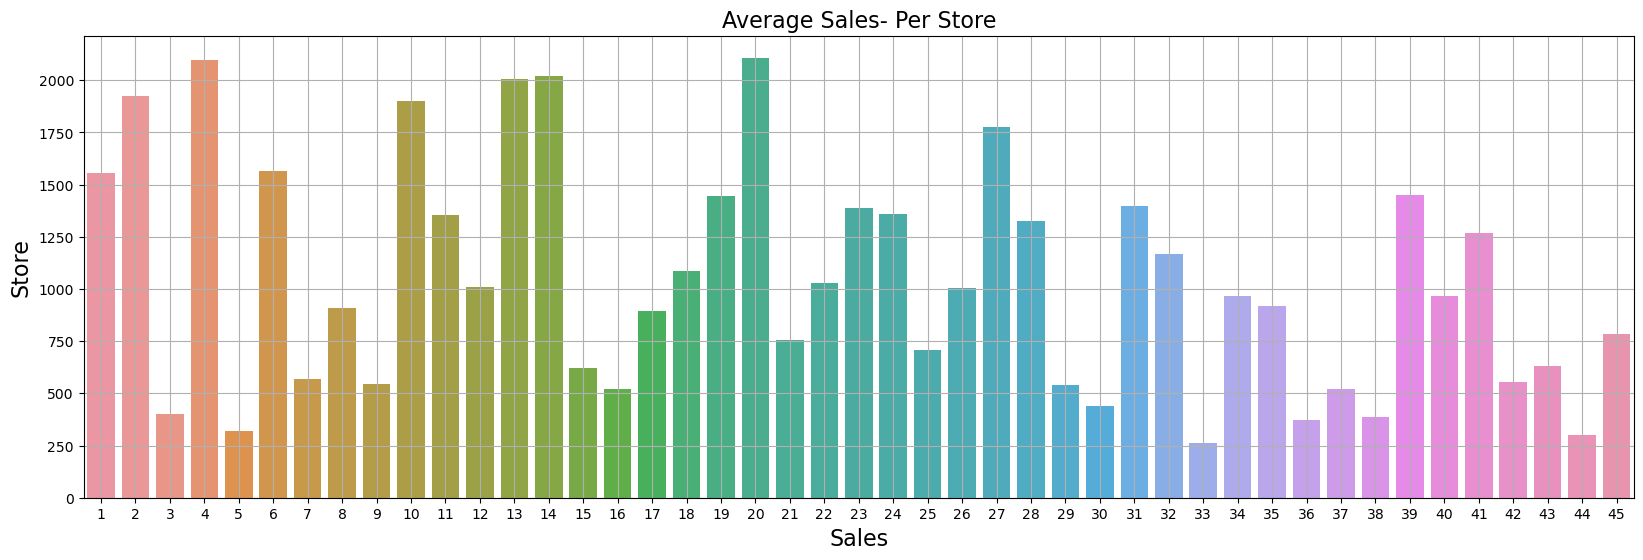

In [28]:
weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(20,6))
plt.style.use('default')
sns.barplot(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title('Average Sales- Per Store', fontsize=16)
plt.xlabel('Sales', fontsize=16)
plt.ylabel('Store', fontsize=16)
plt.show()

# We will consider one of the stores and perform a detailed time-series analysis on it

# Store 10

In [29]:
data.set_index('Date', inplace=True)

In [30]:
store10 = data[data.Store == 10]
# there are about 45 different stores in this dataset.

sales10 = pd.DataFrame(store10.Weekly_Sales.groupby(store10.index).sum())
sales10.dtypes
sales10.head(20)
# Grouped weekly sales by store 10

#remove date from index to change its dtype because it clearly isnt acceptable.
sales10.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales10['Date'] = pd.to_datetime(sales10['Date'])
# resetting date back to the index
sales10.set_index('Date',inplace = True)

In [31]:
store10.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02     10    2193.04875             0        54.34       2.962   
2010-12-02     10    2176.02852             1        49.96       2.828   
2010-02-19     10    2113.43258             0        58.22       2.915   
2010-02-26     10    2006.77496             0        52.77       2.825   
2010-05-03     10    1987.09009             0        55.92       2.877   

                   CPI  Unemployment  Day Month  Year  Week  
Date                                                         
2010-05-02  126.442065         9.765    2   May  2010    17  
2010-12-02  126.496258         9.765    2   Dec  2010    48  
2010-02-19  126.526286         9.765   19   Feb  2010     7  
2010-02-26  126.552286         9.765   26   Feb  2010     8  
2010-05-03  126.578286         9.765    3   May  2010    18

# Store 11

In [32]:
store11 = data[data.Store == 11]
# there are about 45 different stores in this dataset.

sales11 = pd.DataFrame(store11.Weekly_Sales.groupby(store11.index).sum())
sales11.dtypes
sales11.head(20)
# Grouped weekly sales by store 11

#remove date from index to change its dtype because it clearly isnt acceptable.
sales11.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales11['Date'] = pd.to_datetime(sales11['Date'])
# resetting date back to the index
sales11.set_index('Date',inplace = True)

In [33]:
store11.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02     11    1528.00864             0        46.04       2.572   
2010-12-02     11    1574.68408             1        48.01       2.548   
2010-02-19     11    1503.29870             0        48.30       2.514   
2010-02-26     11    1336.40465             0        52.79       2.561   
2010-05-03     11    1426.62265             0        53.96       2.625   

                   CPI  Unemployment  Day Month  Year  Week  
Date                                                         
2010-05-02  214.424881         7.368    2   May  2010    17  
2010-12-02  214.574792         7.368    2   Dec  2010    48  
2010-02-19  214.619887         7.368   19   Feb  2010     7  
2010-02-26  214.647513         7.368   26   Feb  2010     8  
2010-05-03  214.675139         7.368    3   May  2010    18

<AxesSubplot:title={'center':'Weekly Sales for Store 10'}, xlabel='Date'>

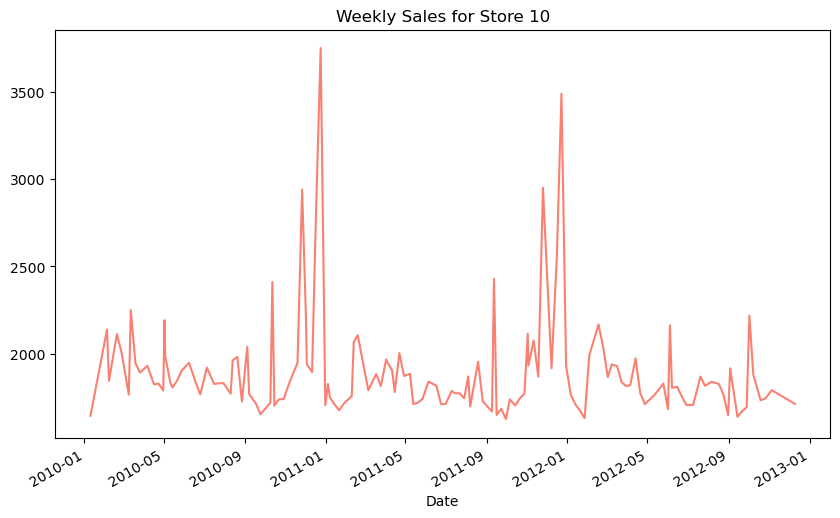

In [34]:
sales10.Weekly_Sales.plot(figsize=(10,6), title = 'Weekly Sales for Store 10', color= 'salmon')

<AxesSubplot:title={'center':'Weekly Sales for Store 11'}, xlabel='Date'>

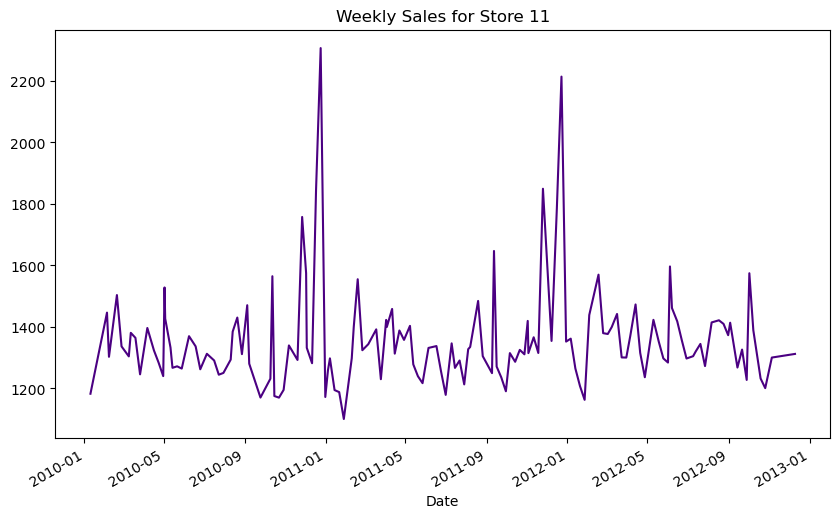

In [35]:
sales11.Weekly_Sales.plot(figsize=(10,6), title = 'Weekly Sales for Store 11', color= 'indigo')

# Time Series Forecasting with a SARIMA Model

In [36]:
# Implementing Time Series Analsyis

<Figure size 640x480 with 0 Axes>

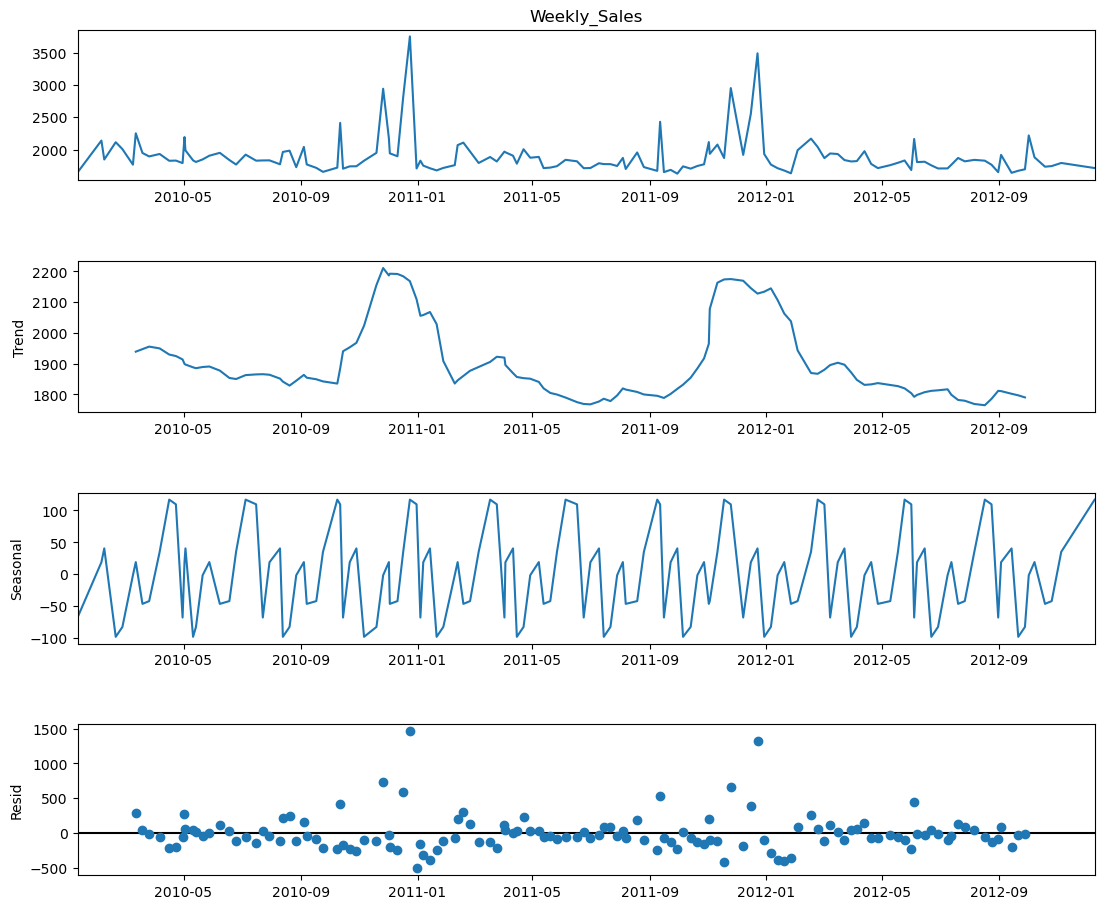

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales10.Weekly_Sales, period =12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

# Multiplicative Decomposition
-An additive model suggests that the components are multipled together.

-An additive model is non-linear such as quadratic or exponential.

-Changes increase or decrease over time.

-A non-linear seasonality has an increasing or decreasing frequency (width of the cycles) and / or amplitude (height of the cycles) over time.

<Figure size 640x480 with 0 Axes>

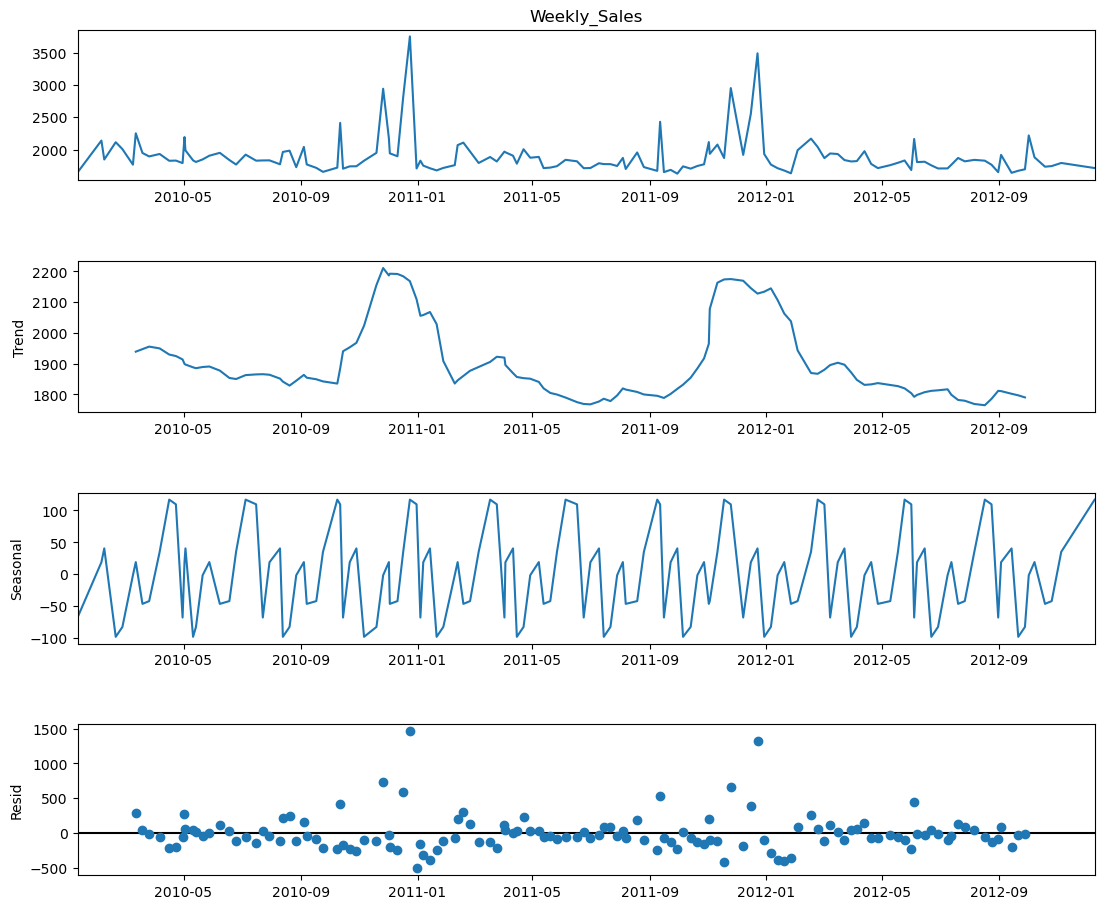

In [38]:
decomposition = seasonal_decompose(sales10.Weekly_Sales, model= 'Multiplicative', period =12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

In [39]:
y1 = sales10.Weekly_Sales
y2 = sales11.Weekly_Sales

In [40]:
y1.head()

Date
2010-01-10    1645.89297
2010-02-04    2138.65197
2010-02-07    1845.89387
2010-02-19    2113.43258
2010-02-26    2006.77496
Name: Weekly_Sales, dtype: float64

In [41]:
y2.head()

Date
2010-01-10    1182.49046
2010-02-04    1446.21026
2010-02-07    1302.60014
2010-02-19    1503.29870
2010-02-26    1336.40465
Name: Weekly_Sales, dtype: float64

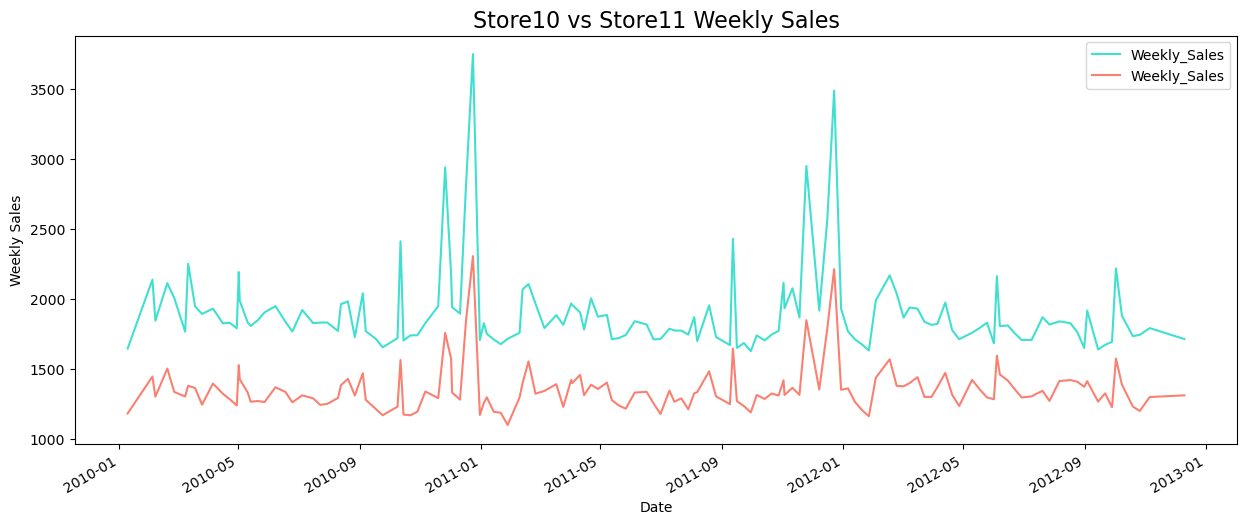

In [42]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store10 vs Store11 Weekly Sales', fontsize = '16')
plt.show()

This shows an interesting trend during year ends (during both 2011 & 2012). The best thing is both the stores have almost the same trends and spike just the magnitude is different. 
    
This clearly tells its a timeseries problem and it will be interesting to look more into it

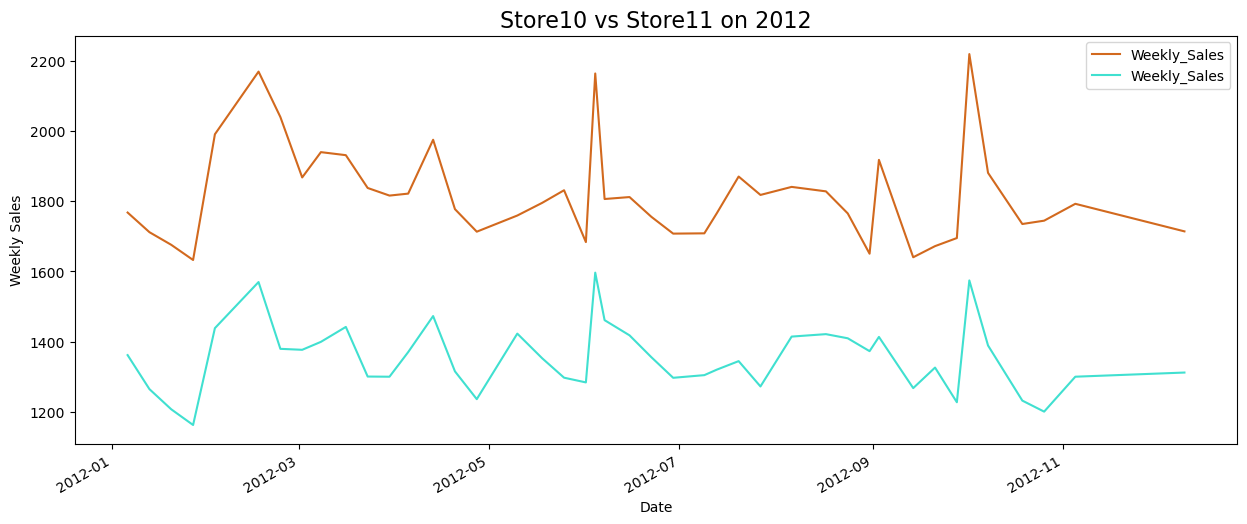

In [43]:
# Lets Look into 2012 data for a better view
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store10 vs Store11 on 2012', fontsize = '16')
plt.show()

#### Not quite a trend. Here comes yet another component of timeseries - Irregular component

    which are other non random sources of variations of series and are mainly the impact of random events such as strikes, earthquakes, and sudden changes in the weather. By their nature, these effects are completely unpredictable.

In [44]:
# Define the p, d and q  parameters to take any value between 0 and 2

p = d = q = range(0,5)

# Generate all different combination of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combination of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]


In [45]:
import statsmodels.api as sm 
mod = sm.tsa.statespace.SARIMAX(y1, order = (4, 4, 3), seasonal_order = (1, 1, 0, 52), enforce_invertibility = False)
results = mod.fit()

print(results.summary().tables[1])

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6248      0.590     -1.060      0.289      -1.781       0.531
ar.L2         -0.6795      0.592     -1.147      0.251      -1.840       0.481
ar.L3         -0.3421      0.610     -0.560      0.575      -1.539       0.854
ar.L4         -0.2161      0.435     -0.497      0.619      -1.069       0.637
ma.L1         -2.7661      0.527     -5.250      0.000      -3.799      -1.734
ma.L2          2.5820      1.077      2.397      0.017       0.470       4.694
ma.L3         -0.8130      0.567     -1.434      0.152      -1.924       0.298
ar.S.L52      -0.2716      0.424     -0.640      0.522      -1.103       0.560
sigma2      2.584e+05   6.93e+04      3.732      0.000    1.23e+05    3.94e+05


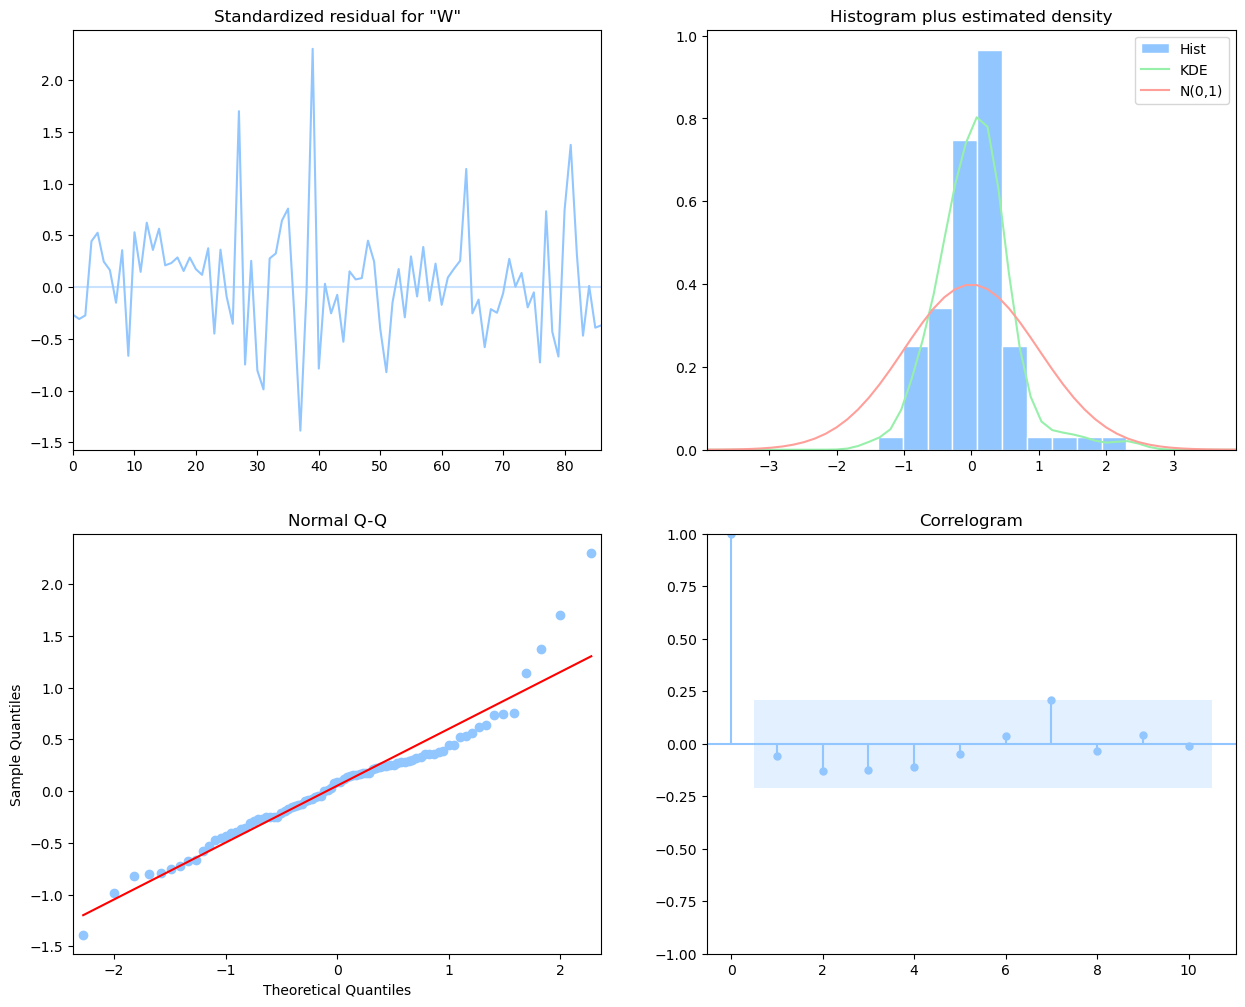

In [46]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [47]:
# Will predict for last 90 days, So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

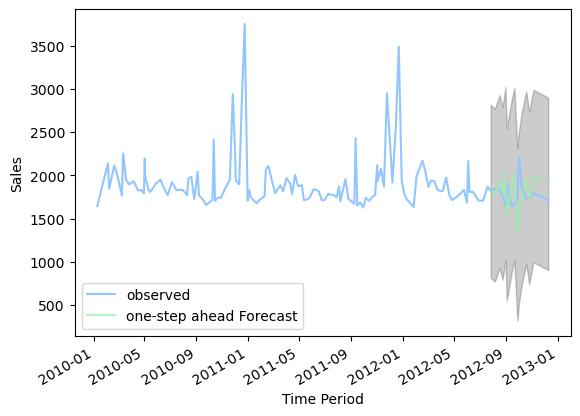

In [48]:
ax = y1['2010':].plot(label= 'observed')
pred.predicted_mean.plot(ax=ax, label= 'one-step ahead Forecast', alpha= .7)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color= 'k', alpha= .2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [49]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean Square error
mse = ((y_forecasted-y_truth)** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 83079.19


In [50]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

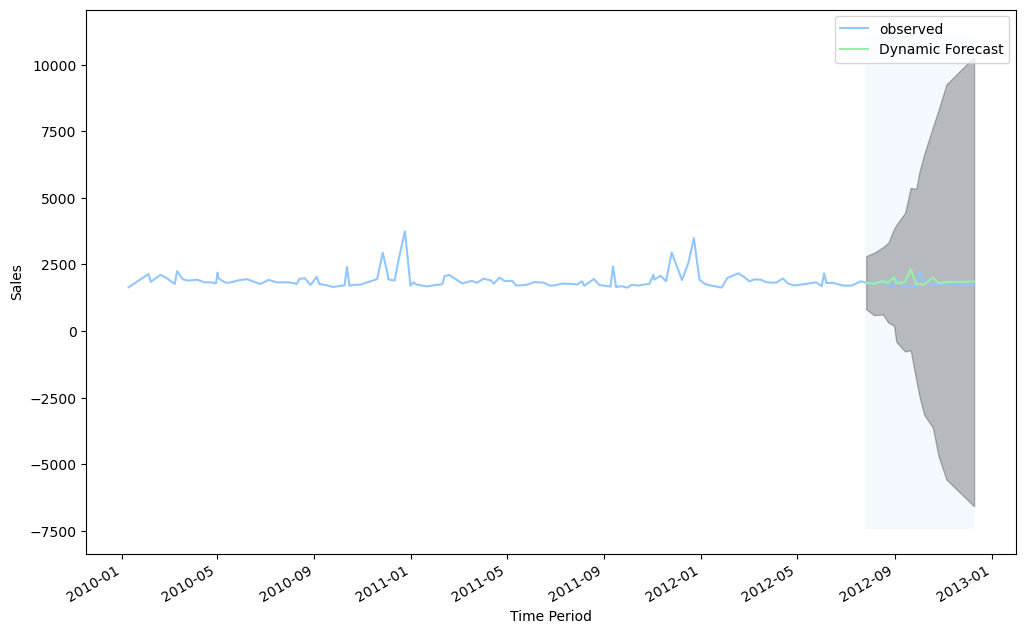

In [51]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

# That looks good. Both the observed and predicted lines go together indicating nearly accurate prediction

In [52]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = y1['2012-7-27':]

# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 254.25


In [53]:
Residual= y_forecasted - y_truth
print("Residual for Store10",np.abs(Residual).sum())

Residual for Store10 2718.199443810172


In [54]:
# Find the last date in your existing data
last_date_in_data = data.index[-1]

# Set the forecast index to match the expected index
forecast_index = pd.date_range(start=last_date_in_data, periods=12, freq='W-FRI')

# Get forecast 12 weeks ahead in the future with the specified index
pred_uc = results.get_forecast(steps=12, index=forecast_index)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


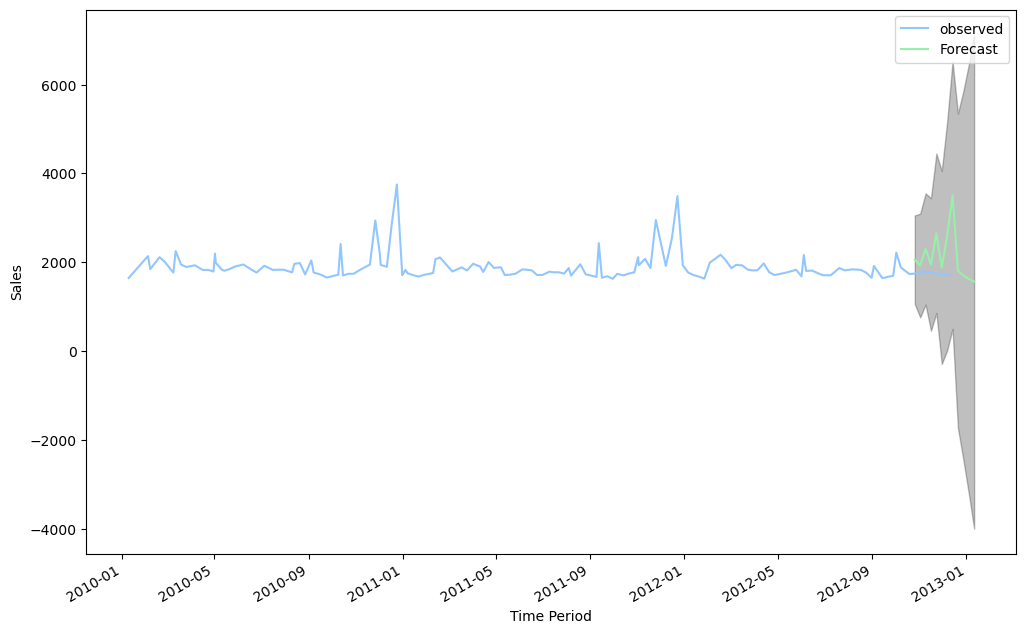

In [55]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

# Conclusion

In conclusion, this project stands as a testament to the fusion of advanced time series analysis and forecasting methodologies within the realm of Walmart's retail store sales. The SARIMA model's predictive prowess has yielded invaluable insights, poised to reshape inventory management and elevate sales strategies.
